<a href="https://colab.research.google.com/github/ha-re-ram/AIML-Lab/blob/main/Exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# Load dataset from the specified path
file_path = '/content/Social_Network_Ads.csv'
df = pd.read_csv(file_path)

In [21]:
# Preview the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
# Check the shape
df.shape

(400, 5)

In [23]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
# Basic statistics
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [25]:
# Select only numerical features for clustering
df_numeric = df[['Age', 'EstimatedSalary']]

In [26]:
# Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

In [27]:
# Check scaled data
pd.DataFrame(scaled_df, columns=['Age', 'EstimatedSalary']).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


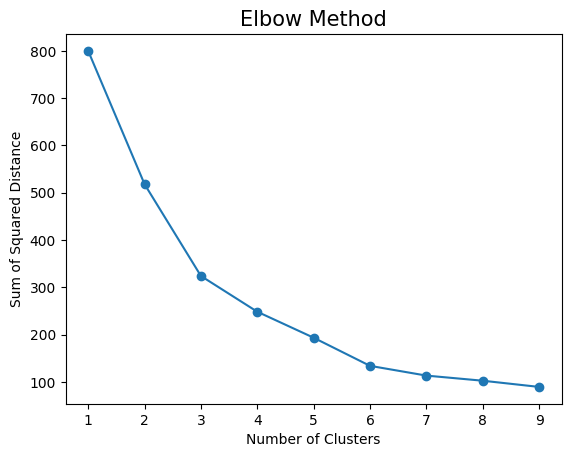

In [28]:
# Plot elbow curve
a = []
K = range(1, 10)
for i in K:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_df)
    a.append(model.inertia_)

plt.plot(K, a, marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

In [29]:
# Choosing number of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [30]:
# Count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

,count
1,163
0,155
2,82


In [31]:
# Calculate how good our model is
metrics.silhouette_score(scaled_df, kmeans.labels_)

np.float64(0.36459936028849116)

In [32]:
# Predicting values
cluster_labels = kmeans.fit_predict(scaled_df)
preds = kmeans.labels_

In [33]:
# Add predicted cluster labels to original DataFrame
kmeans_df = df.copy()
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,KMeans_Clusters
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1
5,15728773,Male,27,58000,0,1
6,15598044,Female,27,84000,0,1
7,15694829,Female,32,150000,1,2
8,15600575,Male,25,33000,0,1
9,15727311,Female,35,65000,0,1


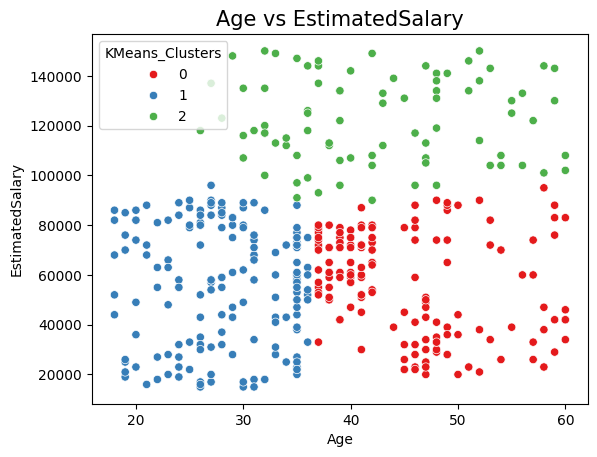

In [34]:
# Visualization of clusters: Age vs EstimatedSalary
sns.scatterplot(x='Age', y='EstimatedSalary', hue='KMeans_Clusters', data=kmeans_df, palette='Set1')
plt.title("Age vs EstimatedSalary", fontsize=15)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()